# CH03 회귀 알고리즘과 모델 규제

## 03-1 k—최근접 이웃 회귀

In [277]:
import numpy as np

In [278]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [279]:
import matplotlib.pyplot as plt


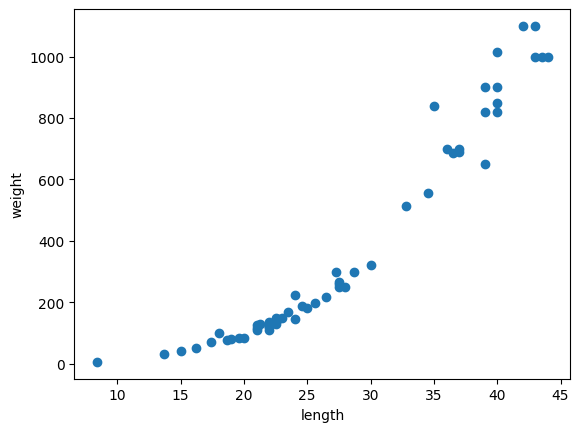

In [280]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 커짐에 따라 무게도 늘어남

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

사이킷런의 세트를 일정하게 나누기 위해 randon_state=42 고정

In [283]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [284]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [285]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [286]:
# test_array = test_array.reshape(2, 3)
# print(test_array.shape)

In [287]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


넘파이는 배열의 크기를
자동으로 지정하는 기능도 제공.  
크기에 -1을 지정하면 다른 차원을 채우고 남은 원소에 맞
게 차원을 지정하라는 의미.

### 결정계수($R^2$)

In [288]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [289]:
print(knr.score(test_input, test_target))

0.992809406101064


분류의 경우는  
테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율. = 정확도  
간단히 말해 정답을 맞힌 개수의 비율

회귀의 경우에는  
각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함.  
그다음 타깃과 타킷 평균의 차이를 제곱하여 더한 값으로 나눔.  
모델이 타깃의 평균 정도를 예측한다 => 결정계수가 0에 가까워짐  
모델이 타깃에 가깝게 예측한다 => 결정계수가 1에 가까워짐

In [290]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 오차값 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


### 과대적합 vs 과소적합

In [291]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [292]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3
# 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [293]:
print(knr.score(train_input, train_target))

0.9804899950518966


In [294]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 03-2 선형 회귀

In [295]:
import numpy as np

In [296]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [297]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [298]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [299]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [300]:
print(knr.predict([[50]]))

[1033.33333333]


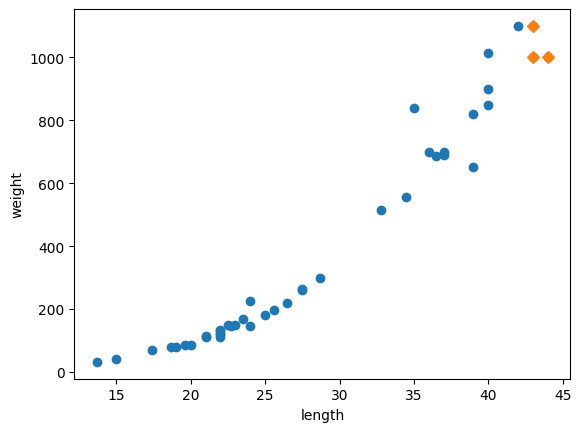

In [301]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃
distance, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [302]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [303]:
print(knr.predict([[100]]))

[1033.33333333]


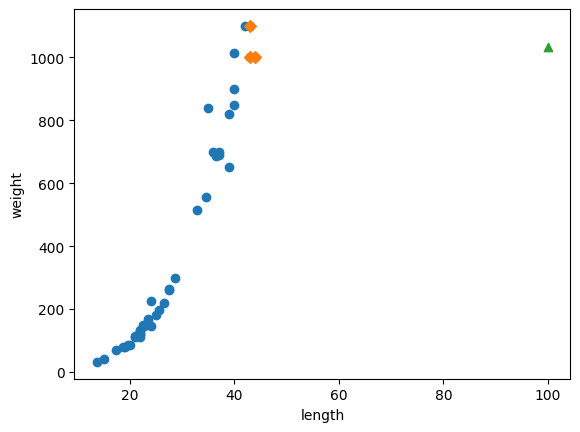

In [304]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀

In [305]:
from sklearn.linear_model import LinearRegression

In [306]:
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [307]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [308]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


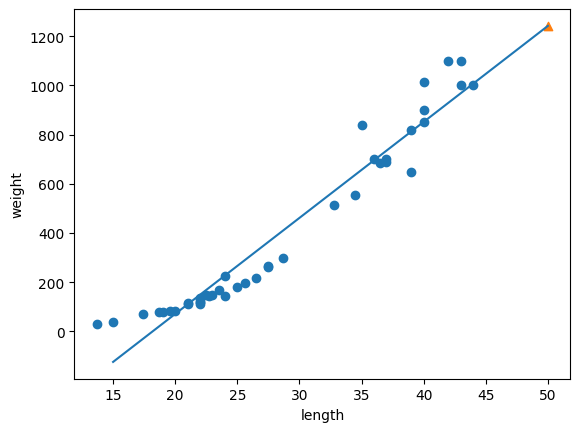

In [309]:
# 훈련 세트 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [310]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 다항 회귀

In [311]:
train_poly = np.column_stack(((train_input ** 2), train_input))
test_poly = np.column_stack(((test_input ** 2), test_input))

In [312]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [313]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [314]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [315]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


## 03-3 특성 공학과 규제

### 다중 회귀

In [316]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [317]:
import numpy as np

In [318]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

In [319]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform () 메서드는 실제
로 데이터를 변환합니다.  
사실 선형 방정식의 절편을 항상 값이 1 인 특성과 곱해지는 계수라고 볼 수 있습니다.  
(길이, 높이, 두께, 1)

In [320]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [321]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [322]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [323]:
test_poly = poly.transform(test_input)

In [324]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [325]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [326]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [327]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [328]:
print(lr.score(test_poly, test_target))

-144.40579436844948


특성의 개수를 크게 늘리면 선형모델이 강력해진다  
훈련 세트에 대해 거의 완벽하게 학습하게 된다.  
그러나 모델이 훈련 세트에 과대적합되므로 테스트 세트에서는 낮은 점수가 나온다

### 규제  
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것  
과대적합이 되지 않도록 하는 것  
선형회귀 모델의 경우  
특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

In [329]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [330]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [331]:
import matplotlib.pyplot as plt

In [332]:
train_score = []
test_score = []

In [333]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델
  ridge = Ridge(alpha=alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


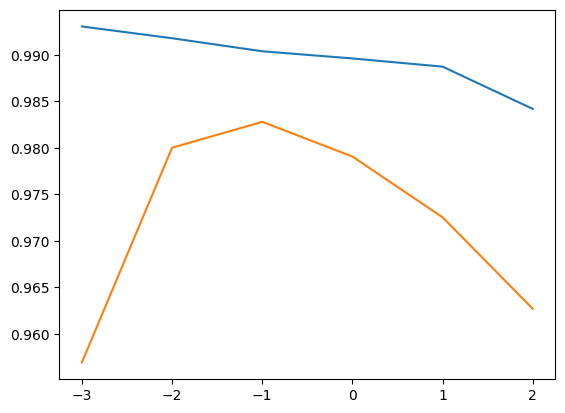

In [334]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [335]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀

In [336]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [337]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [338]:
train_score = []
test_score = []

In [339]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


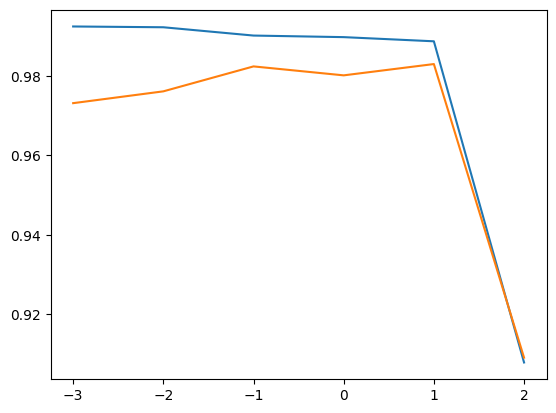

In [340]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [341]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [342]:
print(np.sum(lasso.coef_ == 0))

40
